In [2]:
import numpy as np
import sklearn.neighbors
import sklearn.svm
import sklearn.linear_model
import sklearn.ensemble
import sklearn.naive_bayes
import pandas as pd
import seaborn as sns 
import torch
import matplotlib.pyplot as plt
import matplotlib.transforms
import sklearn.metrics

In [3]:
def trainAll(feat, K, RF, NB): 
    X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(feat, labels, test_size=0.33, random_state=42)
    y_test = np.ravel(y_test)
    y_train = np.ravel(y_train)


    knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors = K)
    knn.fit(X_train, y_train)

    svm = sklearn.svm.SVC(kernel='rbf')
    svm.fit(X_train, y_train)


    lr = sklearn.linear_model.LogisticRegression(max_iter=1000)
    lr.fit(X_train, y_train)


    rf = sklearn.ensemble.RandomForestClassifier(n_estimators=RF)
    rf.fit(X_train, y_train)


    gb = sklearn.ensemble.GradientBoostingClassifier(n_estimators=GB)
    gb.fit(X_train, y_train)


    nb = sklearn.naive_bayes.GaussianNB()
    nb.fit(X_train, y_train)

    return [knn, svm, lr, rf, gb, nb]

In [8]:
cn = [0,1]

names = ["KNN", "SVM", "LR", "RF", "GB", "NB"]
colors = [plt.cm.Blues, plt.cm.Reds, plt.cm.Greens, plt.cm.Greys, plt.cm.Purples, plt.cm.YlOrBr]

data = pd.read_pickle("data.pkl")
feat1 = data[["Kur_ECR", "Kur_FCU", "Skew_ECR", "Skew_FCU", "SSC_ECR", "SSC_FCU", "WA_ECR", "WA_FCU", "WL_ECR", "WL_FCU", "SD_ECR", "SD_FCU", "Zc_ECR", "Zc_FCU", "Mean_ECR", "Mean_FCU","Var_ECR", "Var_FCU"]]

pca_a = pd.read_pickle("all_pca.pkl")
feat2 = pca_a[["Dim1", "Dim2", "Dim3"]]

feat3 = data[["SSC_ECR", "WA_FCU", "WL_ECR", "WL_FCU","SD_ECR", "SD_FCU","Mean_ECR", "Mean_FCU", "Var_FCU"]]

pca_s = pd.read_pickle("subs_pca.pkl")
feat4 = pca_s[["Dim1", "Dim2"]]

labels = data["Labels"]
labels = (np.array(labels)).reshape((-1,1))

feats = [feat1, feat2, feat3, feat4]
fn = ["All", "PCA All", "Subset", "PCA Subset"]
Ks = [7, 1, 7, 5]
RFs = [31, 49, 15, 49]
GBs = [23, 20, 36, 44]

df_cm = []

for i in range(4): 

    fs = fn[i]
    feat = feats[i]
    K = Ks[i]
    RF = RFs[i]
    GB = GBs[i]

    X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(feat, labels, test_size=0.33, random_state=42)

    classifiers = trainAll(feat, K, RF, GB)

    for (j) in range(6):
        classifier = classifiers[j]

        pred = classifier.predict(X_test)
        cm = sklearn.metrics.confusion_matrix(y_test, pred, labels=cn)

        tmp = pd.DataFrame(cm, index = [i for i in ["Real", "Virtual"]],
                columns = [i for i in ["Real", "Virtual"]])

        if (i==0 and j==0): 
                df_cm = [tmp]
        else:
                df_cm.append(tmp)



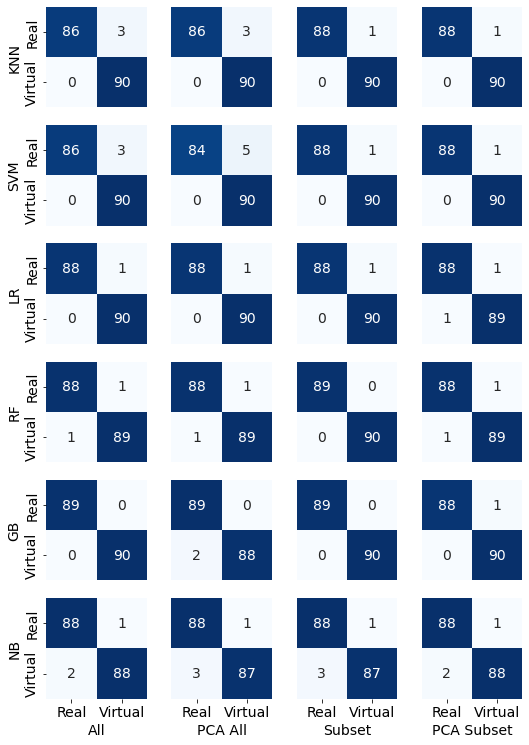

In [15]:
font = {'size'   : 14}

plt.rc('font', **font)
fig, axes = plt.subplots(nrows=6, ncols=4, figsize=(15,10))

for i in range(4):
    fs = feats[i]
    for j in range(6):

        cl = names[j]
        tmp = df_cm[6*i + j]
        
        if ((i == 3) & (j == 5)):
            p = sns.heatmap(tmp, ax=axes[j, i], cmap=plt.cm.Blues, annot=True, square=True, xticklabels=True, yticklabels=False, cbar=False)
        elif ((i == 0) & (j == 5)):
            p = sns.heatmap(tmp, ax=axes[j, i], cmap=plt.cm.Blues, annot=True, square=True, cbar=False, xticklabels=True)
        elif (i == 0):
            p = sns.heatmap(tmp, ax=axes[j, i], cmap=plt.cm.Blues, annot=True, square=True, cbar=False, xticklabels=False, yticklabels=True)
        elif (j == 5):
            p = sns.heatmap(tmp, ax=axes[j, i], cmap=plt.cm.Blues, annot=True, square=True, cbar=False, xticklabels=True, yticklabels=False)
        else: 
            p = sns.heatmap(tmp, ax=axes[j, i], cmap=plt.cm.Blues, annot=True, square=True, xticklabels=False, yticklabels=False, cbar=False)
 
plt.setp(axes[-1, 0], xlabel='All')
plt.setp(axes[-1, 1], xlabel='PCA All')
plt.setp(axes[-1, 2], xlabel='Subset')
plt.setp(axes[-1, 3], xlabel='PCA Subset')
plt.setp(axes[0, 0], ylabel='KNN')
plt.setp(axes[1, 0], ylabel='SVM')
plt.setp(axes[2, 0], ylabel='LR')
plt.setp(axes[3, 0], ylabel='RF')
plt.setp(axes[4, 0], ylabel='GB')
plt.setp(axes[5, 0], ylabel='NB')

plt.tight_layout(pad=-0.4, w_pad=-35.0, h_pad=1)
axes[5,3].set_position(matplotlib.transforms.Bbox([[0.6272457238229431, 0.04638888888888881], [0.7204010368740894, 0.18612185846560836]]))
plt.show()

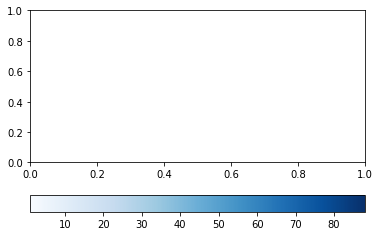

In [74]:
figc, axc = plt.subplots()
figc.colorbar(p.get_children()[0], ax=axc, orientation="horizontal")
plt.show()